### Import required python libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns
from ers.similarity_combination_element_lib import SimilarityCombinationElement
from ers.post_processing import generate_linkage_matrix, sort_matrix

### Declare parameters of the notebook

In [2]:
INPUT_DATA = "../data/HEA_data.demo.csv"
OUTPUT_FOLDER = "../results/demo_1"
SIMILARITY_VALUE = 0.1 # parameter alpha
MAX_SIZE_SUBSET = 2 # max size of elements combinations measured the similarity and used to predict the property of alloy
ELEMENTS = ['Ag', 'Au', 'Co', 'Cr', 'Cu', 'Fe', 'Mo', 'Ni', 'Pd', 'Pt']
METHOD = "ward"
METRIC = "euclidean"

In [3]:
def ax_setting():
    plt.style.use('default')
    plt.tick_params(axis='x', which='major', labelsize=24)
    plt.tick_params(axis='y', which='major', labelsize=24)

### Learn similarity matrix

In [ ]:
df_data = pd.read_csv(INPUT_DATA, index_col=0)
similarity_combination_element = SimilarityCombinationElement(
    df_data=df_data, similarity_value=SIMILARITY_VALUE, rage_size_subset=MAX_SIZE_SUBSET
)
similarity_combination_element.similarity_measurement()

In [5]:
df_similarity = similarity_combination_element.df_similarity
df_dissimilarity = similarity_combination_element.df_dissimilarity
df_uncertainty = similarity_combination_element.df_uncertainty
df_similarity.loc[ELEMENTS, ELEMENTS]

,Ag,Au,Co,Cr,Cu,Fe,Mo,Ni,Pd,Pt
Ag,1.000000,0.625041,0.362868,0.319512,0.471862,0.416623,0.319060,0.511208,0.404990,0.366956
Au,0.625041,1.000000,0.342842,0.297052,0.574511,0.200450,0.366474,0.379876,0.634044,0.511208
Co,0.362868,0.342842,1.000000,0.217869,0.338878,0.625041,0.366474,0.617218,0.331635,0.315688
Cr,0.319512,0.297052,0.217869,1.000000,0.417128,0.146029,0.543536,0.168793,0.275117,0.045646
Cu,0.471862,0.574511,0.338878,0.417128,1.000000,0.200450,0.275531,0.469746,0.672103,0.548576
Fe,0.416623,0.200450,0.625041,0.146029,0.200450,1.000000,0.276469,0.366956,0.168793,0.445707
Mo,0.319060,0.366474,0.366474,0.543536,0.275531,0.276469,1.000000,0.342374,0.290534,0.137948
Ni,0.511208,0.379876,0.617218,0.168793,0.469746,0.366956,0.342374,1.000000,0.730337,0.583919
Pd,0.404990,0.634044,0.331635,0.275117,0.672103,0.168793,0.290534,0.730337,1.000000,0.716757
Pt,0.366956,0.511208,0.315688,0.045646,0.548576,0.445707,0.137948,0.583919,0.716757,1.000000


### Visualize dendogram

In [6]:
linkage_matrix, distance_matrix = generate_linkage_matrix(
    df_similarity.loc[ELEMENTS,ELEMENTS], df_dissimilarity.loc[ELEMENTS,ELEMENTS], df_uncertainty.loc[ELEMENTS,ELEMENTS], 
    method=METHOD, metric=METRIC
)

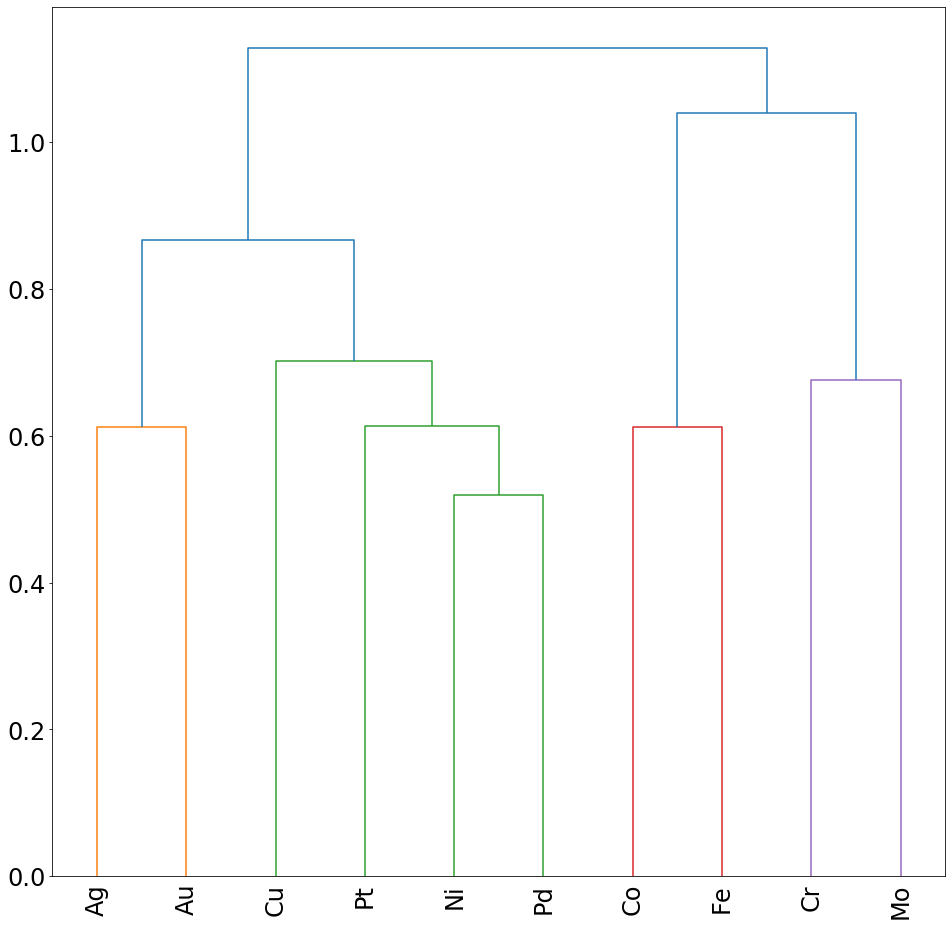

In [7]:
dendogram_figure = plt.figure(figsize=(16, 16))

dendrogram = hierarchy.dendrogram(
    Z=linkage_matrix, 
    labels=ELEMENTS,
    leaf_font_size=20
)

ax_setting()
plt.xticks(rotation=90)
plt.savefig("{}/dendogram.pdf".format(OUTPUT_FOLDER), dpi=300, bbox_inches='tight')
plt.show()

### Visualize the similarity matrix

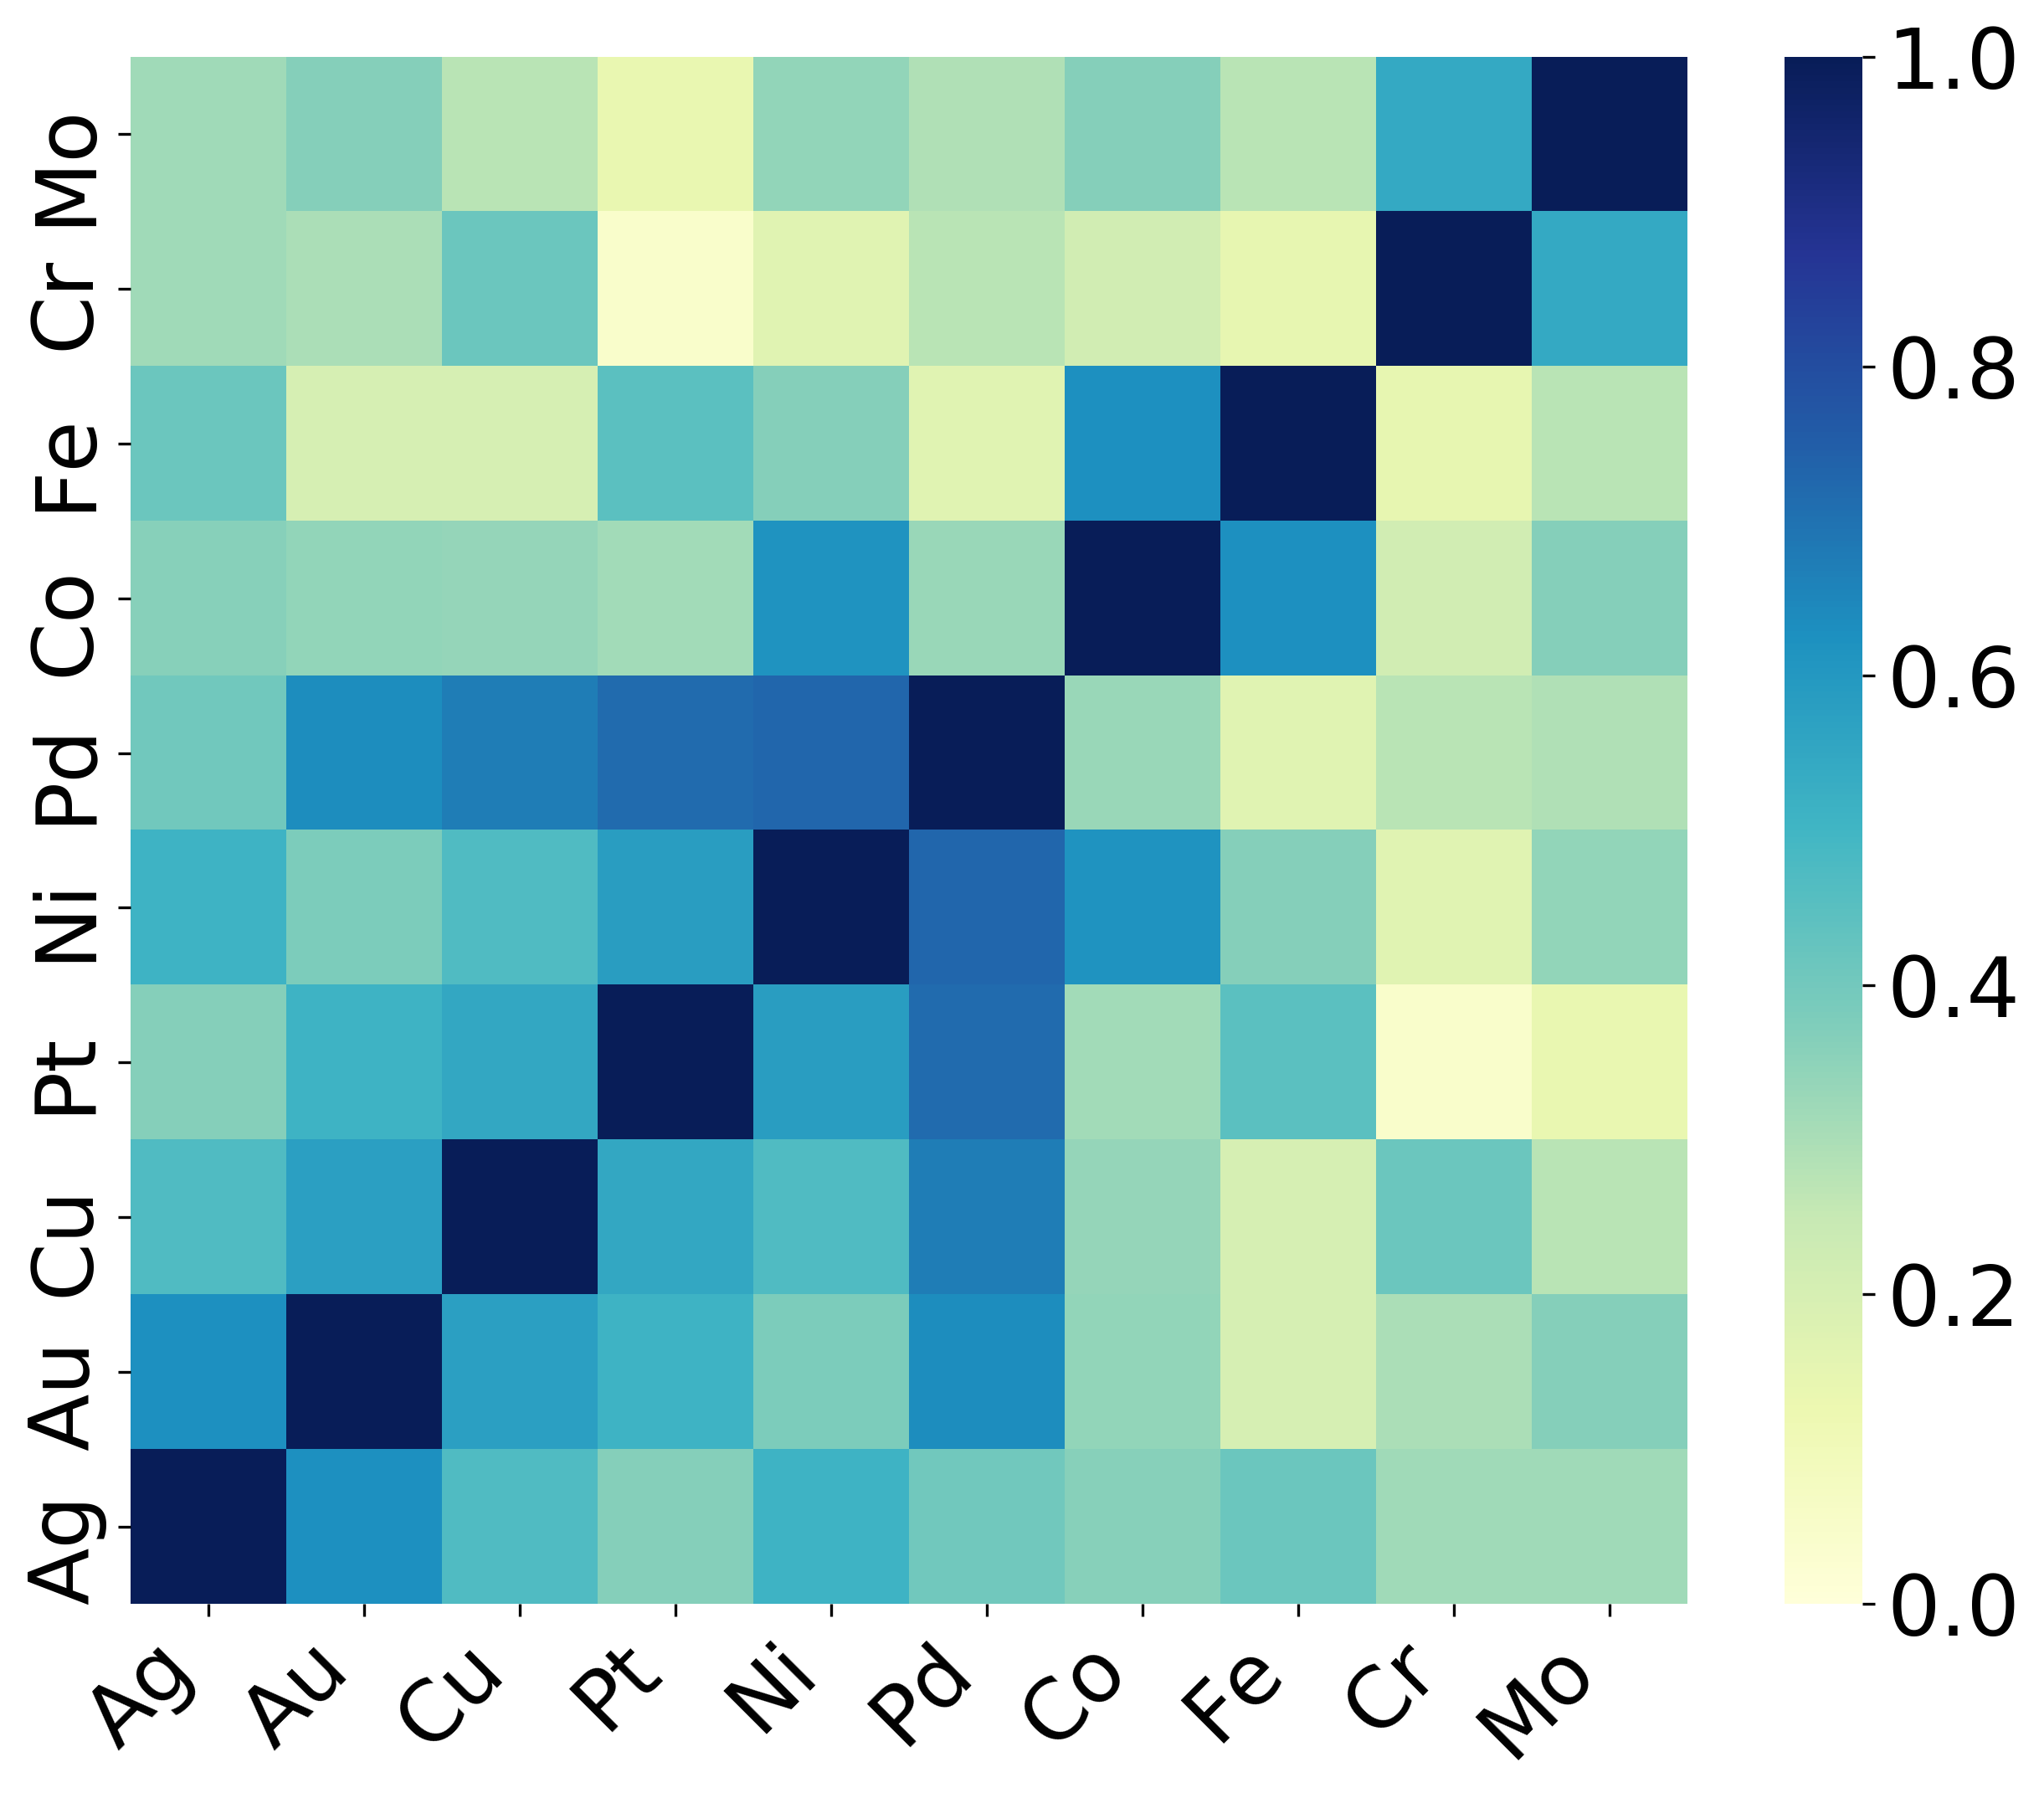

In [8]:
plt.figure(figsize=(10,8), dpi=300)
ax_setting()
# Sort the order of elements in similarity matrix using the order obtained from dendogram
df_matrix = sort_matrix(df_similarity.loc[ELEMENTS, ELEMENTS], order=dendrogram["ivl"])
ax = sns.heatmap(df_matrix, cmap="YlGnBu", xticklabels=df_matrix.columns.values, 
    yticklabels=df_matrix.index.values, vmax=1, vmin=0
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=24)
plt.xticks(rotation=45, horizontalalignment="right")
plt.savefig("{}/similarity.pdf".format(OUTPUT_FOLDER), dpi=300, bbox_inches='tight')
plt.show()